<h1>
    Exploratory Data Analysis
</h1>

In [1]:
!pip install sqlalchemy==2.0


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 187.9 kB/s eta 0:00:10
    --------------------------------------- 0.0/1.8 MB 219.4 kB/s eta 0:00:08
   -- ------------------------------------- 0.1/1.8 MB 504.4 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.8 MB 504.4 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.8 MB 504.4 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.8 MB 504.4 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.8 MB 504.4 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.8 MB 504.4 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.8 MB 284.4 kB/s eta 0:00:06
   ------ ------------

### Connecting to the database

In [2]:
!pip install ipython-sql
!pip install ipython-sql prettytable

In [4]:
# this is amgic command that loads ipython sql extension
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [5]:
import csv, sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [6]:
%sql sqlite:///my_data1.db

In [7]:
import pandas as pd
df = pd.read_csv('Spacex.csv')
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

## removing Blank rows from the table

In [8]:
%sql DROP TABLE IF EXISTS SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


[]

In [9]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

<h3>Displaying the names of the unique launch sites in the space mission</h3>

In [10]:
%sql select distinct Launch_Site from SPACEXTABLE

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


### Displaying 5 records where launch sites begin with the string 'CCA' 

In [55]:
%sql select Launch_Site from SPACEXTABLE where Launch_site like 'CCA%' limit 5

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
CCAFS LC-40
CCAFS LC-40
CCAFS LC-40
CCAFS LC-40


### The total payload mass carried by boosters launched by NASA (CRS)

In [56]:
%%sql
SELECT SUM(PAYLOAD_MASS__KG_) AS Total_Payload_Mass
FROM SPACEXTABLE
WHERE Customer LIKE '%NASA (CRS)%';


 * sqlite:///my_data1.db
Done.


Total_Payload_Mass
48213


### average payload mass carried by booster version F9 v1.1

In [57]:
%%sql
SELECT avg(PAYLOAD_MASS__KG_)  as average_Payload_mass_kg
FROM SPACEXTABLE
WHERE Booster_Version = 'F9 v1.1';


 * sqlite:///my_data1.db
Done.


average_Payload_mass_kg
2928.4


### The date when the first succesful landing outcome in ground pad was acheived.

In [58]:
%%sql
SELECT DISTINCT Landing_Outcome FROM SPACEXTABLE;


 * sqlite:///my_data1.db
Done.


Landing_Outcome
Failure (parachute)
No attempt
Uncontrolled (ocean)
Controlled (ocean)
Failure (drone ship)
Precluded (drone ship)
Success (ground pad)
Success (drone ship)
Success
Failure


In [59]:
%%sql
SELECT MIN(Date) AS First_Successful_Ground_Landing
FROM SPACEXTABLE
WHERE Landing_Outcome = 'Success (ground pad)';


 * sqlite:///my_data1.db
Done.


First_Successful_Ground_Landing
2015-12-22


### The names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000

In [60]:
%%sql
SELECT DISTINCT Booster_Version
FROM SPACEXTABLE
WHERE Landing_Outcome = 'Success (drone ship)'
  AND Payload_Mass__kg_ > 4000
  AND Payload_Mass__kg_ < 6000;


 * sqlite:///my_data1.db
Done.


Booster_Version
F9 FT B1022
F9 FT B1026
F9 FT B1021.2
F9 FT B1031.2


### The total number of successful and failure mission outcomes

In [61]:
%%sql
SELECT Landing_Outcome, COUNT(*) AS Outcome_Count
FROM SPACEXTABLE
GROUP BY Landing_Outcome;


 * sqlite:///my_data1.db
Done.


Landing_Outcome,Outcome_Count
Controlled (ocean),5
Failure,3
Failure (drone ship),5
Failure (parachute),2
No attempt,21
No attempt,1
Precluded (drone ship),1
Success,38
Success (drone ship),14
Success (ground pad),9


###  All the booster_versions that have carried the maximum payload mass.

In [62]:
%%sql
SELECT Booster_Version
FROM SPACEXTABLE
WHERE Payload_MASS__KG_ = (
    SELECT MAX(Payload_MASS__KG_)
    FROM SPACEXTABLE
);


 * sqlite:///my_data1.db
Done.


Booster_Version
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2
F9 B5 B1058.3
F9 B5 B1051.6


### Ranking the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.

In [63]:
%%sql
SELECT 
    Landing_Outcome,
    COUNT(*) AS Outcome_Count
FROM SPACEXTABLE
WHERE Date BETWEEN '2010-06-04' AND '2017-03-20'
GROUP BY Landing_Outcome
ORDER BY Outcome_Count DESC;


 * sqlite:///my_data1.db
Done.


Landing_Outcome,Outcome_Count
No attempt,10
Success (drone ship),5
Failure (drone ship),5
Success (ground pad),3
Controlled (ocean),3
Uncontrolled (ocean),2
Failure (parachute),2
Precluded (drone ship),1


<h2>
    Exploratory Data Analysis Using Pandas and Matplotlib
</h2>

## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


In [64]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
df1 = pd.read_csv('dataset_part_2.csv')
df1.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.


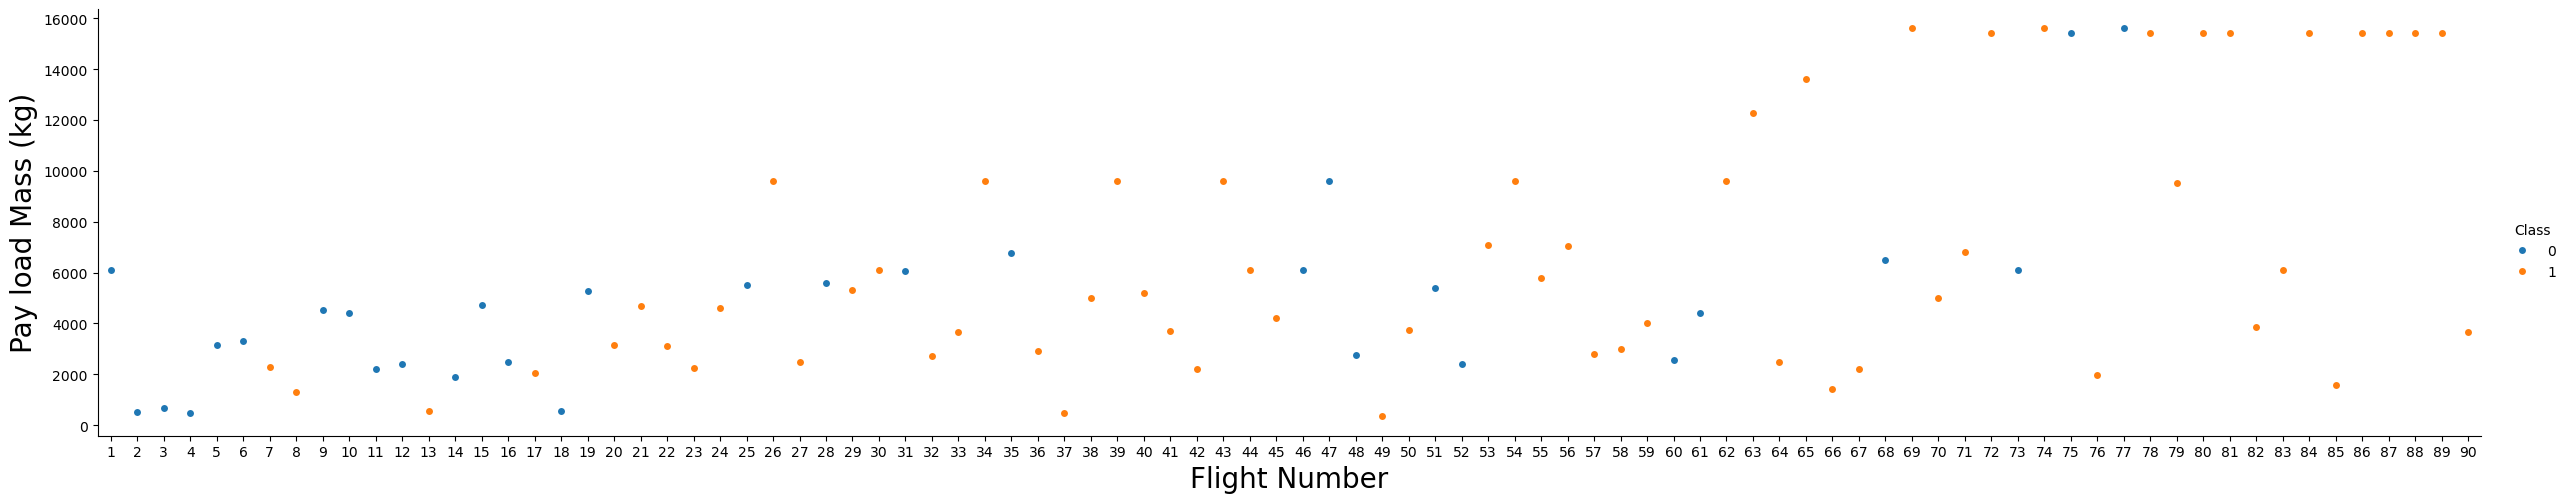

In [72]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df1, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

#### Next, let's drill down to each site visualize its detailed launch records.


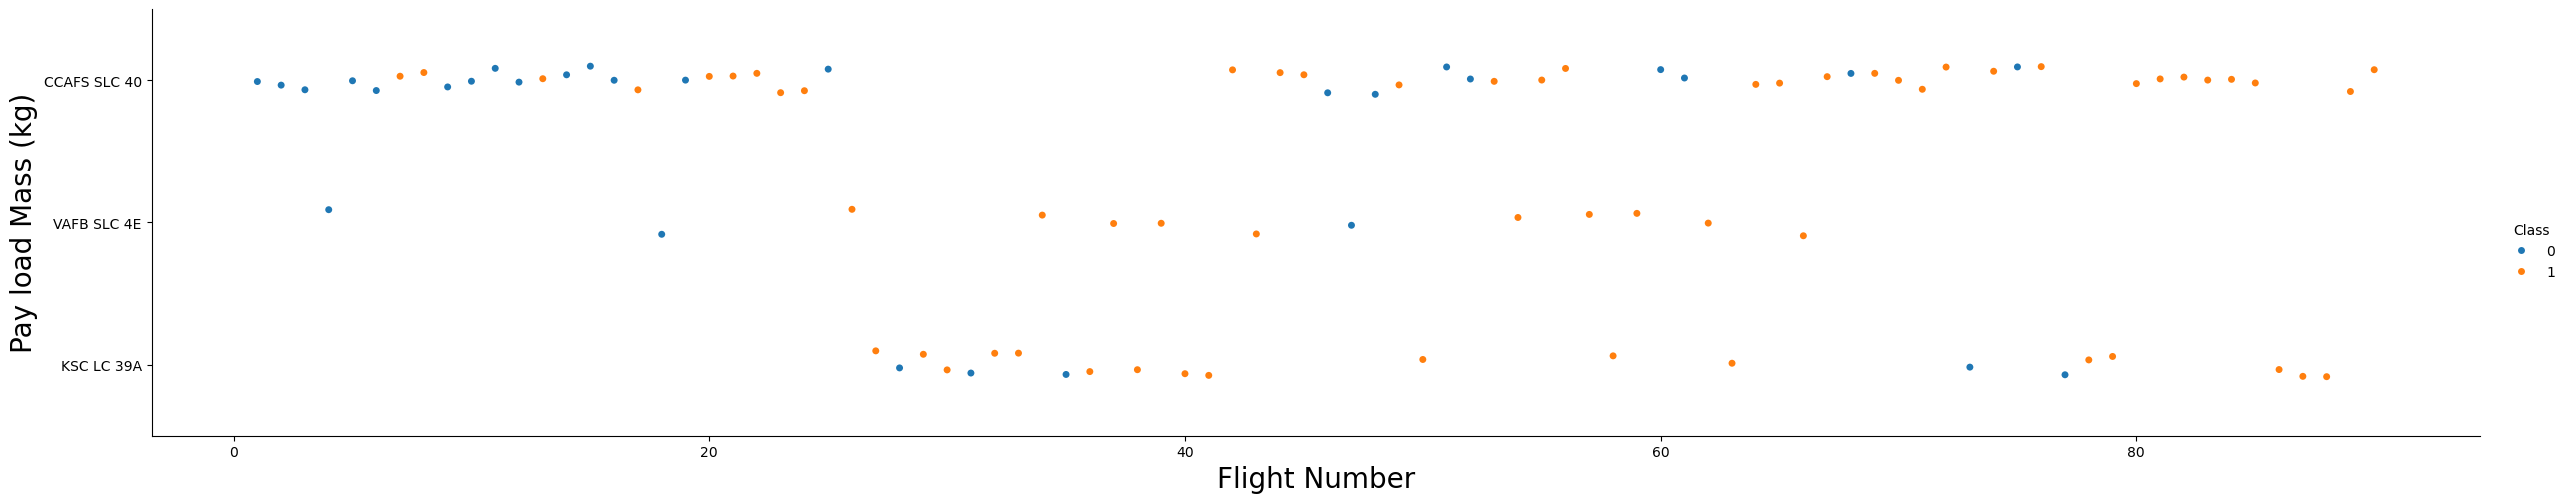

In [74]:
sns.catplot( x="FlightNumber",y = 'LaunchSite', hue="Class", data=df1, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

###  Visualizing the relationship between Payload Mass and Launch Site

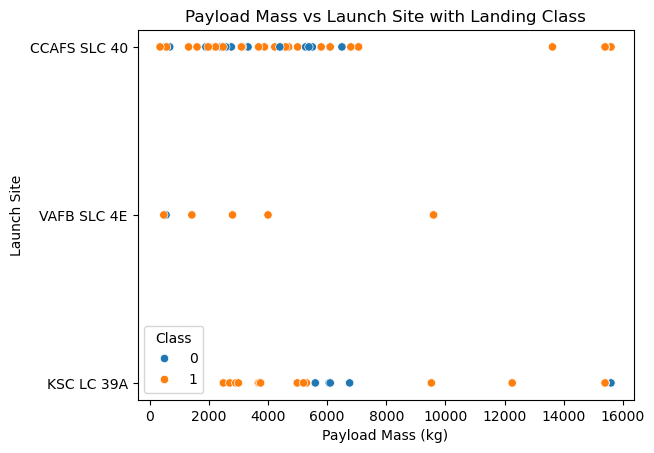

In [76]:
sns.scatterplot(data=df1, x='PayloadMass', y='LaunchSite', hue='Class')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.title('Payload Mass vs Launch Site with Landing Class')
plt.show()

<b>We can observe that for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000).</b>

### Visualizing the relationship between success rate of each orbit type

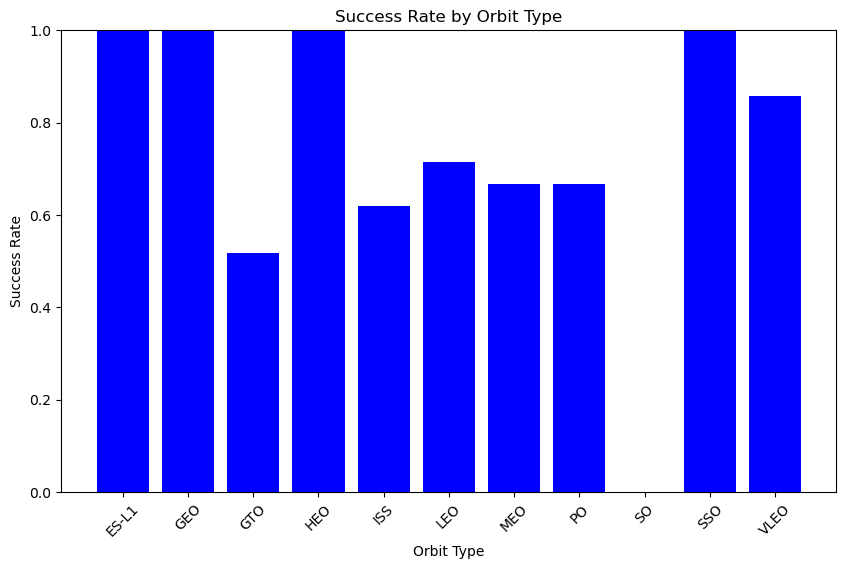

In [81]:
# Group by 'Orbit' and calculate mean success rate
success_rate_by_orbit = df1.groupby('Orbit')['Class'].mean().reset_index()

# Plotting
plt.figure(figsize=(10,6))
plt.bar(success_rate_by_orbit['Orbit'], success_rate_by_orbit['Class'], color='blue')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.title('Success Rate by Orbit Type')
plt.ylim(0, 1)  # since success rate is between 0 and 1
plt.xticks(rotation=45)
plt.show()

<b>
    We can observe that 'ES-L1' , 'GEO' , 'HEO' , 'SSO' have highest mean success rate
</b>

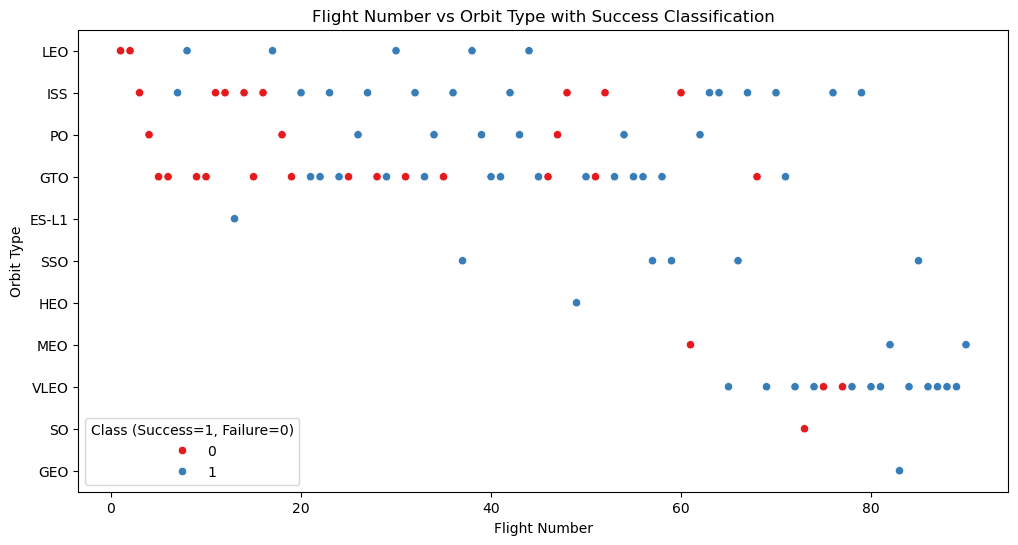

In [82]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df1, x='FlightNumber', y='Orbit', hue='Class', palette='Set1')
plt.title('Flight Number vs Orbit Type with Success Classification')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.legend(title='Class (Success=1, Failure=0)')
plt.show()

<b>
    We can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.
</b>

### Visualizing the relationship between Payload Mass and Orbit type


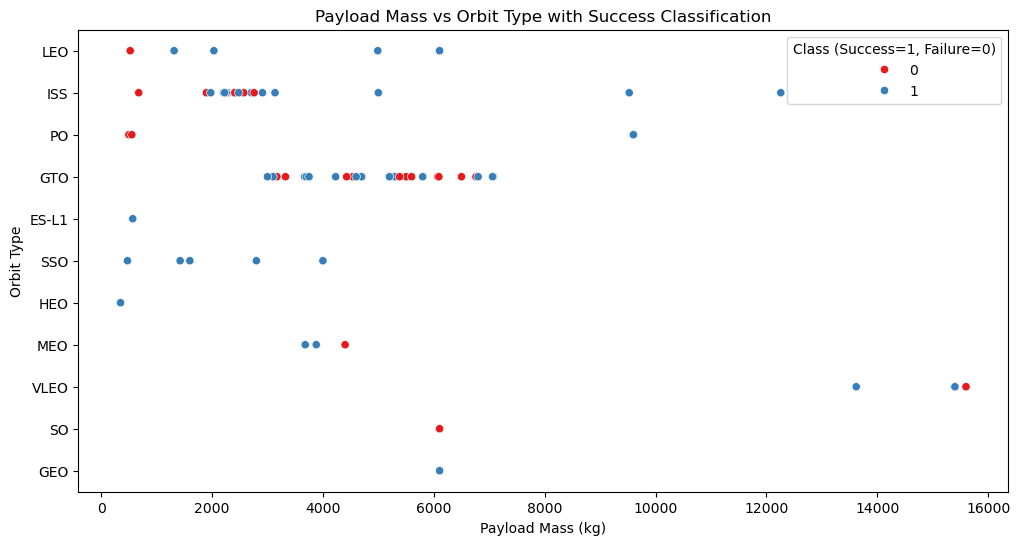

In [84]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df1, x='PayloadMass', y='Orbit', hue='Class', palette='Set1')
plt.title('Payload Mass vs Orbit Type with Success Classification')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.legend(title='Class (Success=1, Failure=0)')
plt.show()

<b> With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are presen </b>t.

### Visualizing the launch success yearly trend


#### getting the year from the date

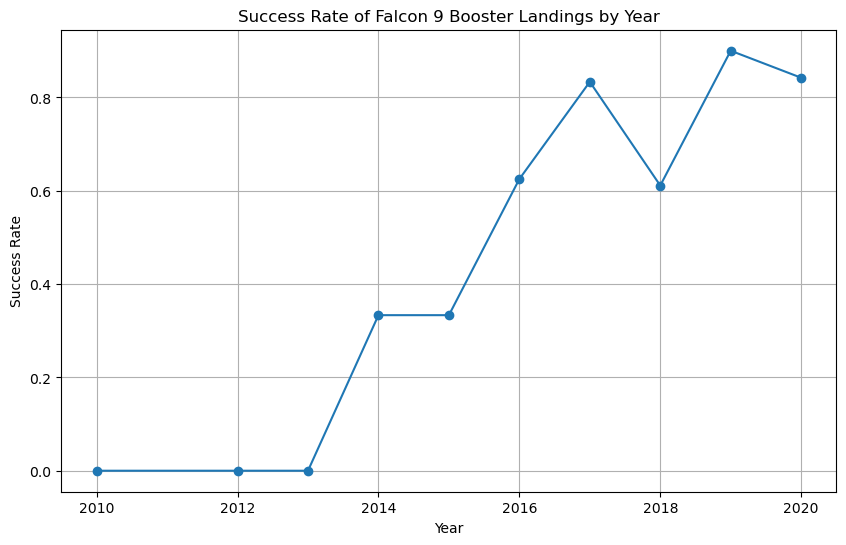

In [98]:
# Make sure 'Date' column is datetime and extract year
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = df1['Date'].dt.year

# Calculating success rate (mean of Class) grouped by Year
success_rate_by_year = df1.groupby('Year')['Class'].mean()

# Plotting line chart
plt.figure(figsize=(10,6))
success_rate_by_year.plot(kind='line', marker='o')
plt.title('Success Rate of Falcon 9 Booster Landings by Year')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.grid(True)
plt.show()


<b>
    We can observe that the sucess rate since 2013 kept increasing till 2020
</b>

<h2>
    Features Engineering
</h2>

By now, we  obtained some preliminary insights about how each important variable would affect the success rate, now we will select the features that will be used in success prediction using <b>Machine Learning</b>

In [99]:
features = df1[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### Creating Dummy Variable to Categorical Columns

In [100]:
# Select categorical columns to one-hot encode
categorical_cols = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Use get_dummies to one-hot encode and keep all other columns as is
features_one_hot = pd.get_dummies(features, columns=categorical_cols)

# Display the first few rows of the result
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [101]:
features_one_hot = features_one_hot.astype('float64')


In [103]:
features_one_hot.tail()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
85,86.0,15400.0,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.0,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.0,6.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15400.0,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
89,90.0,3681.0,1.0,1.0,0.0,1.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [104]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)